In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
from util import PROJECTS_FILE, FILTERED_FILE
#reads projects from Excel file
df = pd.read_excel(PROJECTS_FILE, keep_default_na=False)
len(df)

28543

In [4]:
df = df[df.contributors >= 10]
df = df[df.commits >= 1000]
len(df)

11384

In [5]:
df = df[df.primaryLanguage == 'Java']
df.createdAt = pd.to_datetime(df.createdAt).dt.tz_localize(None) 
df.pushedAt = pd.to_datetime(df.pushedAt).dt.tz_localize(None)
df.to_excel(FILTERED_FILE, index=False)
len(df)


851

In [6]:
df.primaryLanguage.value_counts()

Java    851
Name: primaryLanguage, dtype: int64

In [7]:
len(df.primaryLanguage.value_counts())

1

In [8]:
#filters repositories by language, keeping just the ones that use the top 10 languages in the corpus 
df = df.groupby('primaryLanguage').filter(lambda x: len(x) >= 18)
len(df)

851

In [9]:
pd.set_option('display.max_colwidth', -1) 
df

/var/folders/kc/q64njxfx5xj09h4nrxwncwbw0000gn/T/ipykernel_15576/3122345047.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,owner,name,createdAt,pushedAt,isMirror,diskUsage,primaryLanguage,languages,contributors,watchers,stargazers,forks,issues,commits,pullRequests,branches,tags,releases,description
29,Snailclimb,JavaGuide,2018-05-07 13:27:00,2024-06-30 14:24:04,False,175339,Java,2,516,4522,144522,45385,1011,5415,1320,2,0,0,「Java学习+面试指南」一份涵盖大部分 Java 程序员所需要掌握的核心知识。准备 Java 面试，首选 JavaGuide！
64,iluwatar,java-design-patterns,2014-08-09 16:45:18,2024-06-30 03:48:23,False,34835,Java,4,418,3782,88213,26175,937,4091,2036,5,20,0,Design patterns implemented in Java
84,krahets,hello-algo,2022-11-04 11:08:34,2024-06-28 16:47:46,False,343894,Java,9,168,455,79137,10026,188,1997,1012,6,8,8,"《Hello 算法》：动画图解、一键运行的数据结构与算法教程。支持 Python, Java, C++, C, C#, JS, Go, Swift, Rust, Ruby, Kotlin, TS, Dart 代码。简体版和繁体版同步更新，English version ongoing"
102,spring-projects,spring-boot,2012-10-19 15:02:57,2024-06-30 11:17:42,False,174304,Java,13,1100,3360,73538,40308,34504,49394,6287,20,316,277,Spring Boot
115,elastic,elasticsearch,2010-02-08 13:20:56,2024-06-30 14:42:56,False,1206777,Java,20,3532,2685,68500,24330,35453,78237,74504,345,398,149,"Free and Open, Distributed, RESTful Search Engine"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28427,CodeIntelligenceTesting,jazzer,2021-01-28 19:08:19,2024-08-19 19:39:09,False,5702,Java,6,35,26,1003,134,145,1495,726,23,23,23,"Coverage-guided, in-process fuzzing for the JVM"
28466,spotify-web-api-java,spotify-web-api-java,2014-04-18 23:04:56,2024-08-27 21:45:34,False,46473,Java,2,50,32,1002,287,206,1494,142,3,94,81,A Java wrapper for Spotify's Web API.
28474,mcMMO-Dev,mcMMO,2012-01-05 18:54:08,2024-08-31 20:27:59,False,29763,Java,1,190,79,1002,860,4398,6771,663,46,44,6,The RPG Lover's Mod!
28489,apache,commons-io,2009-05-21 01:38:37,2024-09-06 05:07:24,False,11148,Java,3,167,89,1001,661,0,5128,665,7,80,0,Apache Commons IO


In [10]:
df.describe()

,diskUsage,languages,contributors,watchers,stargazers,forks,issues,commits,pullRequests,branches,tags,releases
count,8.510000e+02,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000
mean,2.430588e+05,7.298472,198.082256,239.547591,6036.423032,1762.254994,1688.987074,8927.102233,2201.871915,50.394830,345.204465,60.210341
std,1.154187e+06,6.006877,296.865892,396.584315,10256.093599,3917.359986,2919.513026,30523.739294,4652.216189,130.471513,2825.910871,105.076316
min,1.547000e+03,1.000000,10.000000,7.000000,1001.000000,23.000000,0.000000,1000.000000,3.000000,1.000000,0.000000,0.000000
25%,1.852450e+04,3.000000,52.000000,68.000000,1594.000000,373.000000,277.000000,1832.000000,276.000000,6.000000,37.000000,5.000000
50%,5.587700e+04,6.000000,107.000000,124.000000,2600.000000,746.000000,790.000000,3655.000000,767.000000,17.000000,82.000000,30.000000
75%,1.979030e+05,10.000000,211.500000,224.500000,5732.500000,1599.000000,1787.000000,7889.000000,2074.000000,43.000000,169.000000,75.500000
max,3.032165e+07,70.000000,3532.000000,4522.000000,144522.000000,54390.000000,35453.000000,814307.000000,74504.000000,2578.000000,73858.000000,1000.000000


In [11]:
#saves filtered projetcts to Excel
#removes timezone from dates, since Excel does not know how to handle that
df.createdAt = pd.to_datetime(df.createdAt).dt.tz_localize(None) 
df.pushedAt = pd.to_datetime(df.pushedAt).dt.tz_localize(None)
df.to_excel(FILTERED_FILE, index=False)

<AxesSubplot:ylabel='primaryLanguage'>

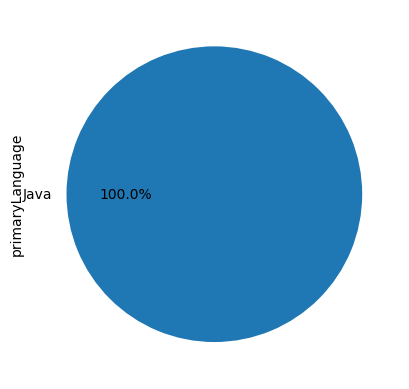

In [12]:
df.primaryLanguage.value_counts().plot(kind='pie', autopct='%1.1f%%')

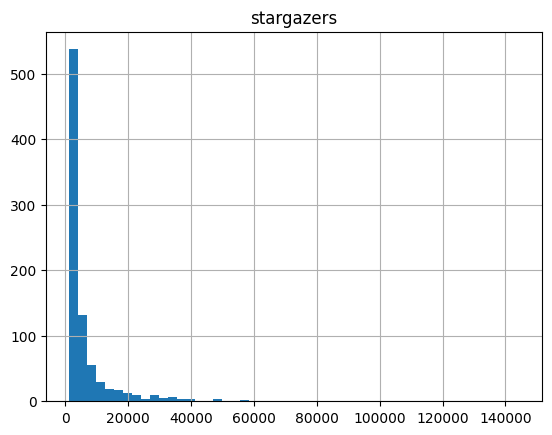

In [13]:
hist = df.hist(column=['stargazers'], bins=50)

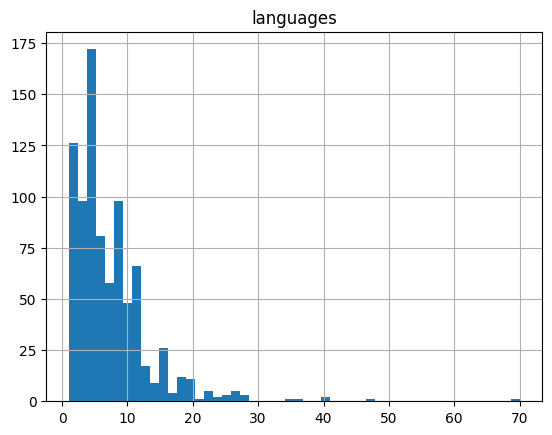

In [14]:
hist = df.hist(column=['languages'], bins=50)

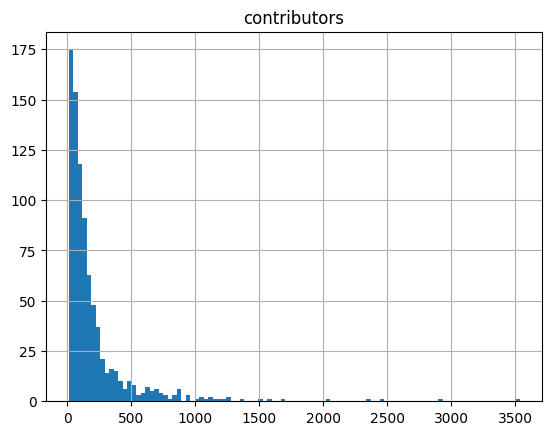

In [15]:
hist = df.hist(column=['contributors'], bins=100)

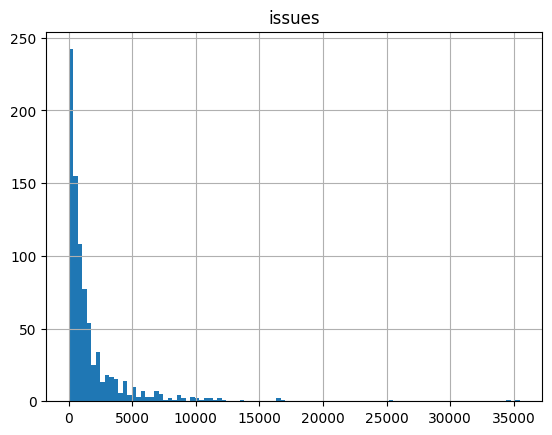

In [16]:
hist = df.hist(column=['issues'], bins=100)

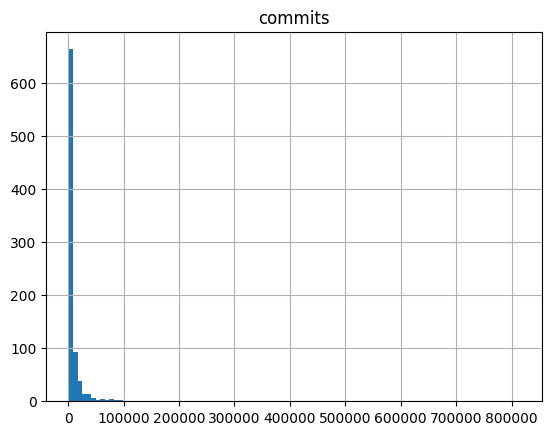

In [17]:
hist = df.hist(column=['commits'], bins=100)

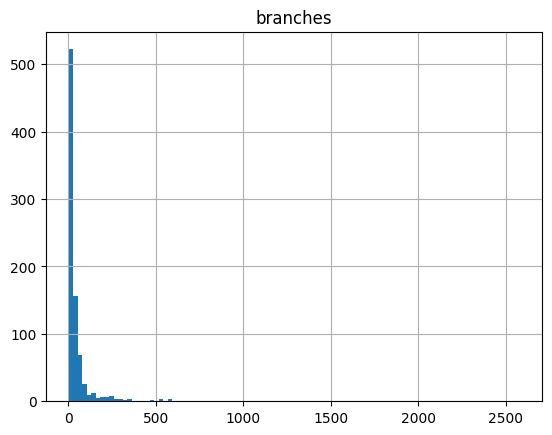

In [18]:
hist = df.hist(column=['branches'], bins=100)

Text(0.5, 0, 'KB')

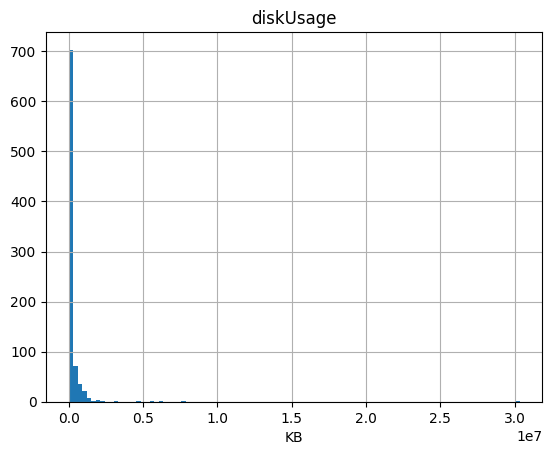

In [19]:
hist = df.hist(column=['diskUsage'], bins=100)
plt.xlabel("KB")

In [20]:
corr = df.drop('isMirror', axis=1).corr()
corr.style.background_gradient(cmap='Reds')

,diskUsage,languages,contributors,watchers,stargazers,forks,issues,commits,pullRequests,branches,tags,releases
diskUsage,1.000000,0.176113,0.169714,0.017382,0.033173,0.041345,0.056567,0.875856,0.122505,0.067377,0.021948,0.060354
languages,0.176113,1.000000,0.382073,0.079552,0.094521,0.182815,0.172358,0.249262,0.376423,0.258618,0.151282,-0.017710
contributors,0.169714,0.382073,1.000000,0.344637,0.312565,0.376510,0.472709,0.276682,0.620138,0.228846,0.104632,0.157893
watchers,0.017382,0.079552,0.344637,1.000000,0.856004,0.838900,0.412376,0.049466,0.243720,0.010620,0.004547,0.051278
stargazers,0.033173,0.094521,0.312565,0.856004,1.000000,0.813813,0.405790,0.044404,0.238445,-0.021471,-0.022782,0.034359
forks,0.041345,0.182815,0.376510,0.838900,0.813813,1.000000,0.428091,0.081341,0.300509,-0.002994,-0.011062,0.033660
issues,0.056567,0.172358,0.472709,0.412376,0.405790,0.428091,1.000000,0.153596,0.535022,0.103771,0.003549,0.205031
commits,0.875856,0.249262,0.276682,0.049466,0.044404,0.081341,0.153596,1.000000,0.247082,0.127248,0.042971,0.069667
pullRequests,0.122505,0.376423,0.620138,0.243720,0.238445,0.300509,0.535022,0.247082,1.000000,0.231999,0.034187,0.160358
branches,0.067377,0.258618,0.228846,0.010620,-0.021471,-0.002994,0.103771,0.127248,0.231999,1.000000,0.745661,0.051679


In [21]:
#Characteristics of the selected projects for our corpus - Table 1
import pandas as pd
from util import ANNOTATED_FILE_JAVA_COMPLET
df = pd.read_excel(ANNOTATED_FILE_JAVA_COMPLET, keep_default_na=False, sheet_name='2021')

df_filter = df[df['discardReason'] == ''] #filtra os projetos sem discardReason

avg_contributors = df_filter['contributors_2024'].mean(skipna=True)
avg_stargazers = df_filter['stargazers_2024'].mean(skipna=True)
avg_forks = df_filter['forks_2024'].mean(skipna=True)
avg_commits = df_filter['commits_2024'].mean(skipna=True)
print("Mean:")
print(avg_contributors)
print(avg_stargazers)
print(avg_forks)
print(avg_commits)

std_contributors = df_filter['contributors_2024'].std(skipna=True)
std_stargazers = df_filter['stargazers_2024'].std(skipna=True)
std_forks = df_filter['forks_2024'].std(skipna=True)
std_commits = df_filter['commits_2024'].std(skipna=True)
print("STD:")
print(std_contributors)
print(std_stargazers)
print(std_forks)
print(std_commits)

minMax_contributors = df_filter['contributors_2024'].agg(['min', 'max'])
minMax_stargazers = df_filter['stargazers_2024'].agg(['min', 'max'])
minMax_forks = df_filter['forks_2024'].agg(['min', 'max'])
minMax_commits = df_filter['commits_2024'].agg(['min', 'max'])
print("Min and Max:")
print(minMax_contributors)
print(minMax_stargazers)
print(minMax_forks)
print(minMax_commits)


quantile_contributors = df_filter['contributors_2024'].quantile([.25, .5, .75])
quantile_stargazers = df_filter['stargazers_2024'].quantile([.25, .5, .75])
quantile_forks = df_filter['forks_2024'].quantile([.25, .5, .75])
quantile_commits = df_filter['commits_2024'].quantile([.25, .5, .75])
print("Quartis:")
print(quantile_contributors)
print(quantile_stargazers)
print(quantile_forks)
print(quantile_commits)



Mean:
263.66022099447514
7280.088397790055
2133.0055248618783
12579.220994475138
STD:
365.0234888172496
10512.692751606084
3754.1688974755407
44608.3246791709
Min and Max:
min    16  
max    3532
Name: contributors_2024, dtype: int64
min    1041 
max    88213
Name: stargazers_2024, dtype: int64
min    119  
max    40308
Name: forks_2024, dtype: int64
min    1262.0  
max    814307.0
Name: commits_2024, dtype: float64
Quartis:
0.25    83.25
0.50    148.5
0.75    276.0
Name: contributors_2024, dtype: object
0.25    2107.25
0.50    3539.5 
0.75    6883.75
Name: stargazers_2024, dtype: object
0.25    578.25
0.50    1006.0
0.75    2040.5
Name: forks_2024, dtype: object
0.25    2998.00 
0.50    5234.50 
0.75    11720.75
Name: commits_2024, dtype: float64


In [9]:
import pandas as pd
from util import COMMIT_FILE
df = pd.read_csv(COMMIT_FILE, keep_default_na=False)

conteudos_para_remover = [
    'android-beacon-library',
    'streamex',
    'YCSB',
    'btrace',
    'libsvm',
    'webmagic',
    'gnucash-android',
    'dozer',
    'find-sec-bugs',
    'FirebaseUI-Android',
    'Gaffer',
    'git-commit-id-maven-plugin',
    'materialistic',
    'pushy',
    'zotfile',
    'jsonschema2pojo',
    'kairosdb',
    'android-gif-drawable',
    'myexcel',
    'eureka',
    'quarkus-quickstarts',
    'mp4parser',
    'scouter',
    'synthea',
    'AmazeFileManager',
    'ArchUnit',
    'epubcheck',
    'jeromq'
]

df = df[~df['name'].isin(conteudos_para_remover)]

avg_commits = df['count'].mean(skipna=True)
std_commits = df['count'].std(skipna=True)
minMax_commits = df['count'].agg(['min', 'max'])
quantile_commits = df['count'].quantile([.25, .5, .75])
sum_commits = df['count'].sum()

print("Commits:")
print(minMax_commits)
print(avg_commits)
print(std_commits)
print(quantile_commits)

print("Soma:")
print(sum_commits)

Commits:
min      1014
max    821332
Name: count, dtype: int64
8642.92817679558
43634.37663896124
0.25    2080.75
0.50    3641.50
0.75    6618.50
Name: count, dtype: float64
Soma:
3128740


Text(0.5, 0, 'KB')

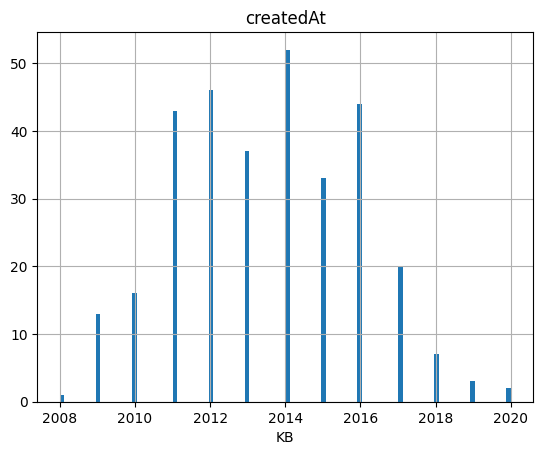

In [21]:
import pandas as pd
from util import ANNOTATED_FILE_JAVA
df = pd.read_excel(ANNOTATED_FILE_JAVA, keep_default_na=False)

df['createdAt'] = pd.DatetimeIndex(df['createdAt']).year
df_filter = df[df['discardReason'] == '']
hist= df_filter.hist(column=['createdAt'], bins=100)
plt.xlabel("KB")
#df.groupby(by=["createdAt"]).value_counts()

min    1007  
max    330851
Name: commits, dtype: int64
3208.0
8372.851735015773


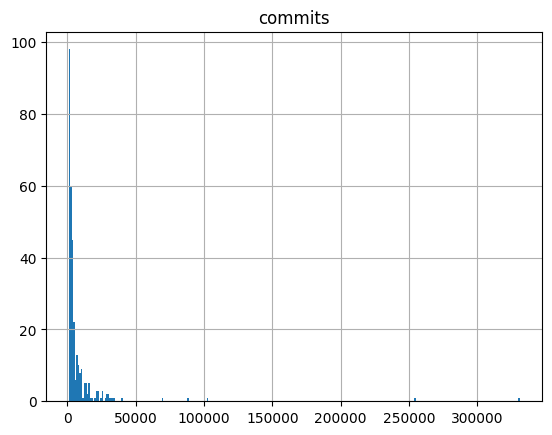

In [22]:
import pandas as pd
from util import ANNOTATED_FILE_JAVA
df = pd.read_excel(ANNOTATED_FILE_JAVA, keep_default_na=False)

df['createdAt'] = pd.DatetimeIndex(df['createdAt']).year
df_filter = df[df['discardReason'] == '']

number = df_filter.count()
#)

hist= df_filter.hist(column=['commits'], bins=300)


minMax_commits = df_filter['commits'].agg(['min', 'max'])
print(minMax_commits)

mediana_commits = df_filter['commits'].median()
print(mediana_commits)

media_commits = df_filter['commits'].mean()
print(media_commits)

In [5]:
import pandas as pd
import re

from util import FILTERED_FILE, FILTERED_FILE_ORM_BD
#reads projects from Excel file
df = pd.read_excel(FILTERED_FILE, keep_default_na=False)
df["BD_ORM"] = ""

orm_list = {'mybatis', 'hibernate', 'jpa', 'spring', 'eclipseLink', 'jooq', 'jdbcmapper'}

for df_tmp in orm_list:
    result_description = ""
    result_description = df[df['description'].str.contains(df_tmp, flags=re.IGNORECASE)]
    if result_description.empty is False:
        for index, row in result_description.iterrows():
            row = df.iloc[[index]]
            df.at[index,'BD_ORM'] = "Olhar manualmente"

    result_name = ""
    result_name = df[df['name'].str.contains(df_tmp, flags=re.IGNORECASE)]
    if result_name.empty is False:
        for index, row in result_name.iterrows():
            row = df.iloc[[index]]
            df.at[index,'BD_ORM'] = "Olhar manualmente"


df.to_excel(FILTERED_FILE_ORM_BD, index=False)

In [6]:
import pandas as pd
import re
from util import FILTERED_FILE_ORM_BD, FILE_BDENGINE
#reads projects from Excel file
df = pd.read_excel(FILTERED_FILE_ORM_BD, keep_default_na=False)
df_bds = pd.read_excel(FILE_BDENGINE, keep_default_na=False)

bds_list = df_bds['DBMS'].to_list()

for df_tmp in bds_list:
    result_description = ""
    result_description = df[df['description'].str.contains(df_tmp, flags=re.IGNORECASE)]
    if result_description.empty is False:
        for index, row in result_description.iterrows():
            row = df.iloc[[index]]
            df.at[index,'BD_ORM'] = "Olhar manualmente"

    result_name = ""
    result_name = df[df['name'].str.contains(df_tmp, flags=re.IGNORECASE)]
    if result_name.empty is False:
        for index, row in result_name.iterrows():
            row = df.iloc[[index]]
            df.at[index,'BD_ORM'] = "Olhar manualmente"



df.to_excel(FILTERED_FILE_ORM_BD, index=False)

/var/folders/kc/q64njxfx5xj09h4nrxwncwbw0000gn/T/ipykernel_21878/1130951940.py:12: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  result_description = df[df['description'].str.contains(df_tmp, flags=re.IGNORECASE)]
/var/folders/kc/q64njxfx5xj09h4nrxwncwbw0000gn/T/ipykernel_21878/1130951940.py:19: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  result_name = df[df['name'].str.contains(df_tmp, flags=re.IGNORECASE)]
